<a href="https://colab.research.google.com/github/TamizharasanG/KNN-and-K-Means-Practice/blob/main/Mobile_price_Classification_With_and_without_Dimentionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modile Price Clustering**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2


In [2]:
data = pd.read_csv("https://github.com/TamizharasanG/KMeans_PCA-Mobile_Price-Clustering/raw/main/mobilepricedata.csv")

In [3]:
data.head()

,Name,Brand_Name,Processor,BrandCategory,ProcessorCategory,Rating,Numbe_of_Ratings,Number_of_Reviews,RAM,ROM,Diplay_Size,Back_Camera,Front_Camera,Battery,Price,Price_Range
0,"Redmi Note 4 (Black, 64 GB)",Redmi,Snapdragon,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749,1
1,"Redmi Note 4 (Dark Grey, 64 GB)",Redmi,Snapdragon,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749,1
2,"Redmi Note 4 (Gold, 64 GB)",Redmi,Snapdragon,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749,1
3,"Redmi Note 4 (Lake Blue, 64 GB)",Redmi,Snapdragon,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749,1
4,"Redmi 5A (Blue, 16 GB)",Redmi,Snapdragon,10,5,4.5,1232827.0,151035.0,2,16,5.0,13.0,5.0,3000,5999,0


In [4]:
data.shape

(2190, 16)

In [5]:
data.isnull().sum()

Name                 0
Brand_Name           0
Processor            0
BrandCategory        0
ProcessorCategory    0
Rating               0
Numbe_of_Ratings     0
Number_of_Reviews    0
RAM                  0
ROM                  0
Diplay_Size          0
Back_Camera          0
Front_Camera         0
Battery              0
Price                0
Price_Range          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2190 non-null   object 
 1   Brand_Name         2190 non-null   object 
 2   Processor          2190 non-null   object 
 3   BrandCategory      2190 non-null   int64  
 4   ProcessorCategory  2190 non-null   int64  
 5   Rating             2190 non-null   float64
 6   Numbe_of_Ratings   2190 non-null   float64
 7   Number_of_Reviews  2190 non-null   float64
 8   RAM                2190 non-null   int64  
 9   ROM                2190 non-null   int64  
 10  Diplay_Size        2190 non-null   float64
 11  Back_Camera        2190 non-null   float64
 12  Front_Camera       2190 non-null   float64
 13  Battery            2190 non-null   int64  
 14  Price              2190 non-null   int64  
 15  Price_Range        2190 non-null   int64  
dtypes: float64(6), int64(7),

In [7]:
data["Price_Range"].nunique()

9

In [8]:
data["Processor"].nunique()

12

In [9]:
data["BrandCategory"].nunique()

14

In [10]:
df = data.copy()

In [11]:
X = df.drop(["Name", "Processor", "Brand_Name", "Price_Range"], axis = 1)
y = df["Price_Range"]

In [12]:
X

,BrandCategory,ProcessorCategory,Rating,Numbe_of_Ratings,Number_of_Reviews,RAM,ROM,Diplay_Size,Back_Camera,Front_Camera,Battery,Price
0,10,5,4.4,1341712.0,211542.0,4,64,5.50,13.0,5.0,4100,12749
1,10,5,4.4,1341712.0,211542.0,4,64,5.50,13.0,5.0,4100,12749
2,10,5,4.4,1341712.0,211542.0,4,64,5.50,13.0,5.0,4100,12749
3,10,5,4.4,1341712.0,211542.0,4,64,5.50,13.0,5.0,4100,12749
4,10,5,4.5,1232827.0,151035.0,2,16,5.00,13.0,5.0,3000,5999
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,7,5,4.0,43.0,0.0,8,12,6.43,64.0,32.0,4500,20799
2186,11,1,4.3,220.0,0.0,4,128,6.60,50.0,13.0,6000,14490
2187,11,1,4.3,220.0,0.0,4,128,6.60,50.0,13.0,6000,14490
2188,11,1,4.3,220.0,0.0,4,128,6.60,50.0,13.0,6000,14490


In [17]:
#Finding the most contributing features 
best_features = SelectKBest(score_func = chi2, k = 10)
features = best_features.fit(X, y)
df_score = pd.DataFrame(features.scores_)
df_cols = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_cols, df_score], axis = 1)
feature_scores.columns = ["Features", "Scores"]
feature_scores["Scores"] = feature_scores["Scores"].map(lambda x : round(x, 2))
feature_scores.sort_values("Scores", ascending = False)
#feature_scores

,Features,Scores
11,Price,64788817.87
3,Numbe_of_Ratings,38002629.80
4,Number_of_Reviews,4659646.39
6,ROM,124017.53
10,Battery,54415.42
8,Back_Camera,12076.69
9,Front_Camera,2280.73
0,BrandCategory,1321.37
5,RAM,1033.13
1,ProcessorCategory,709.43


<Axes: >

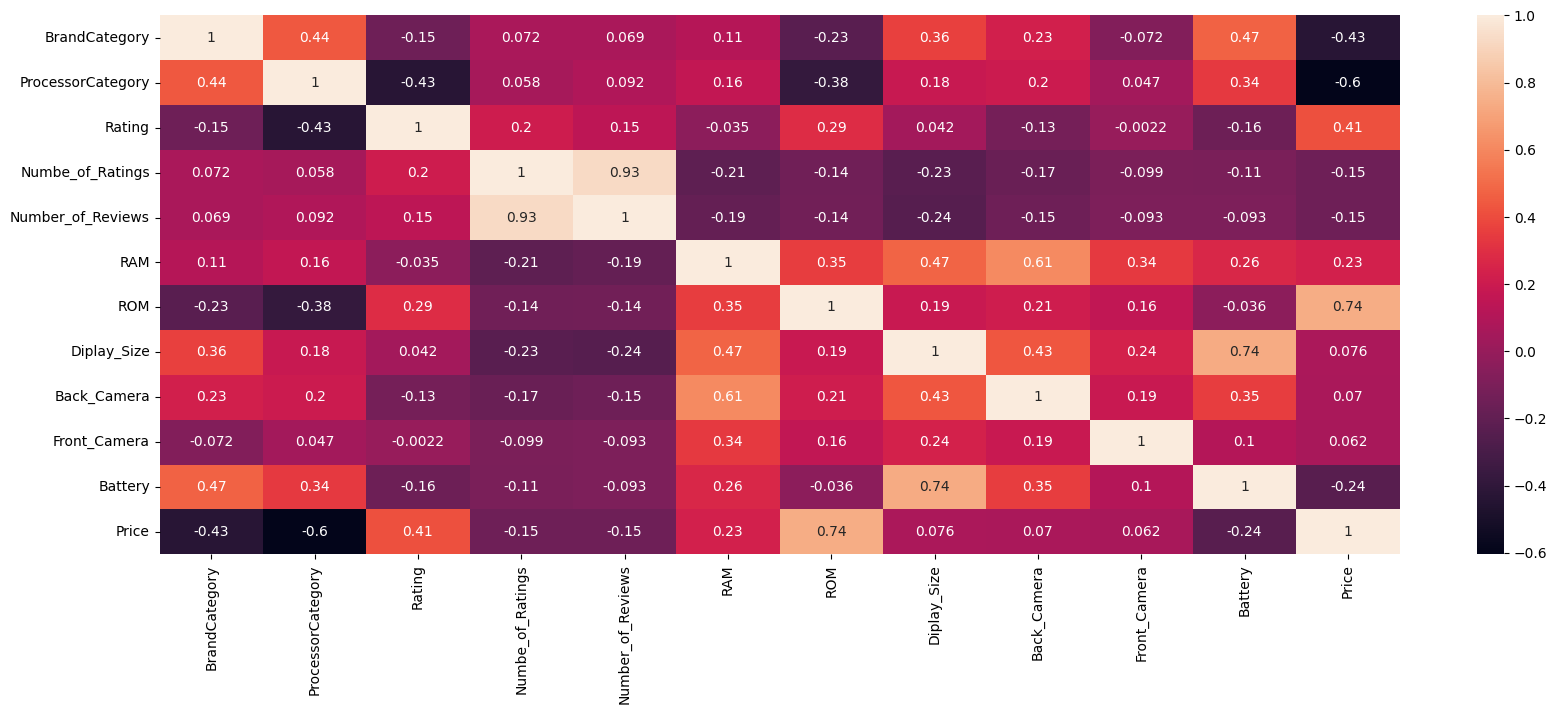

In [20]:
plt.figure(figsize = (20, 7))
sns.heatmap(X.corr(), annot = True)

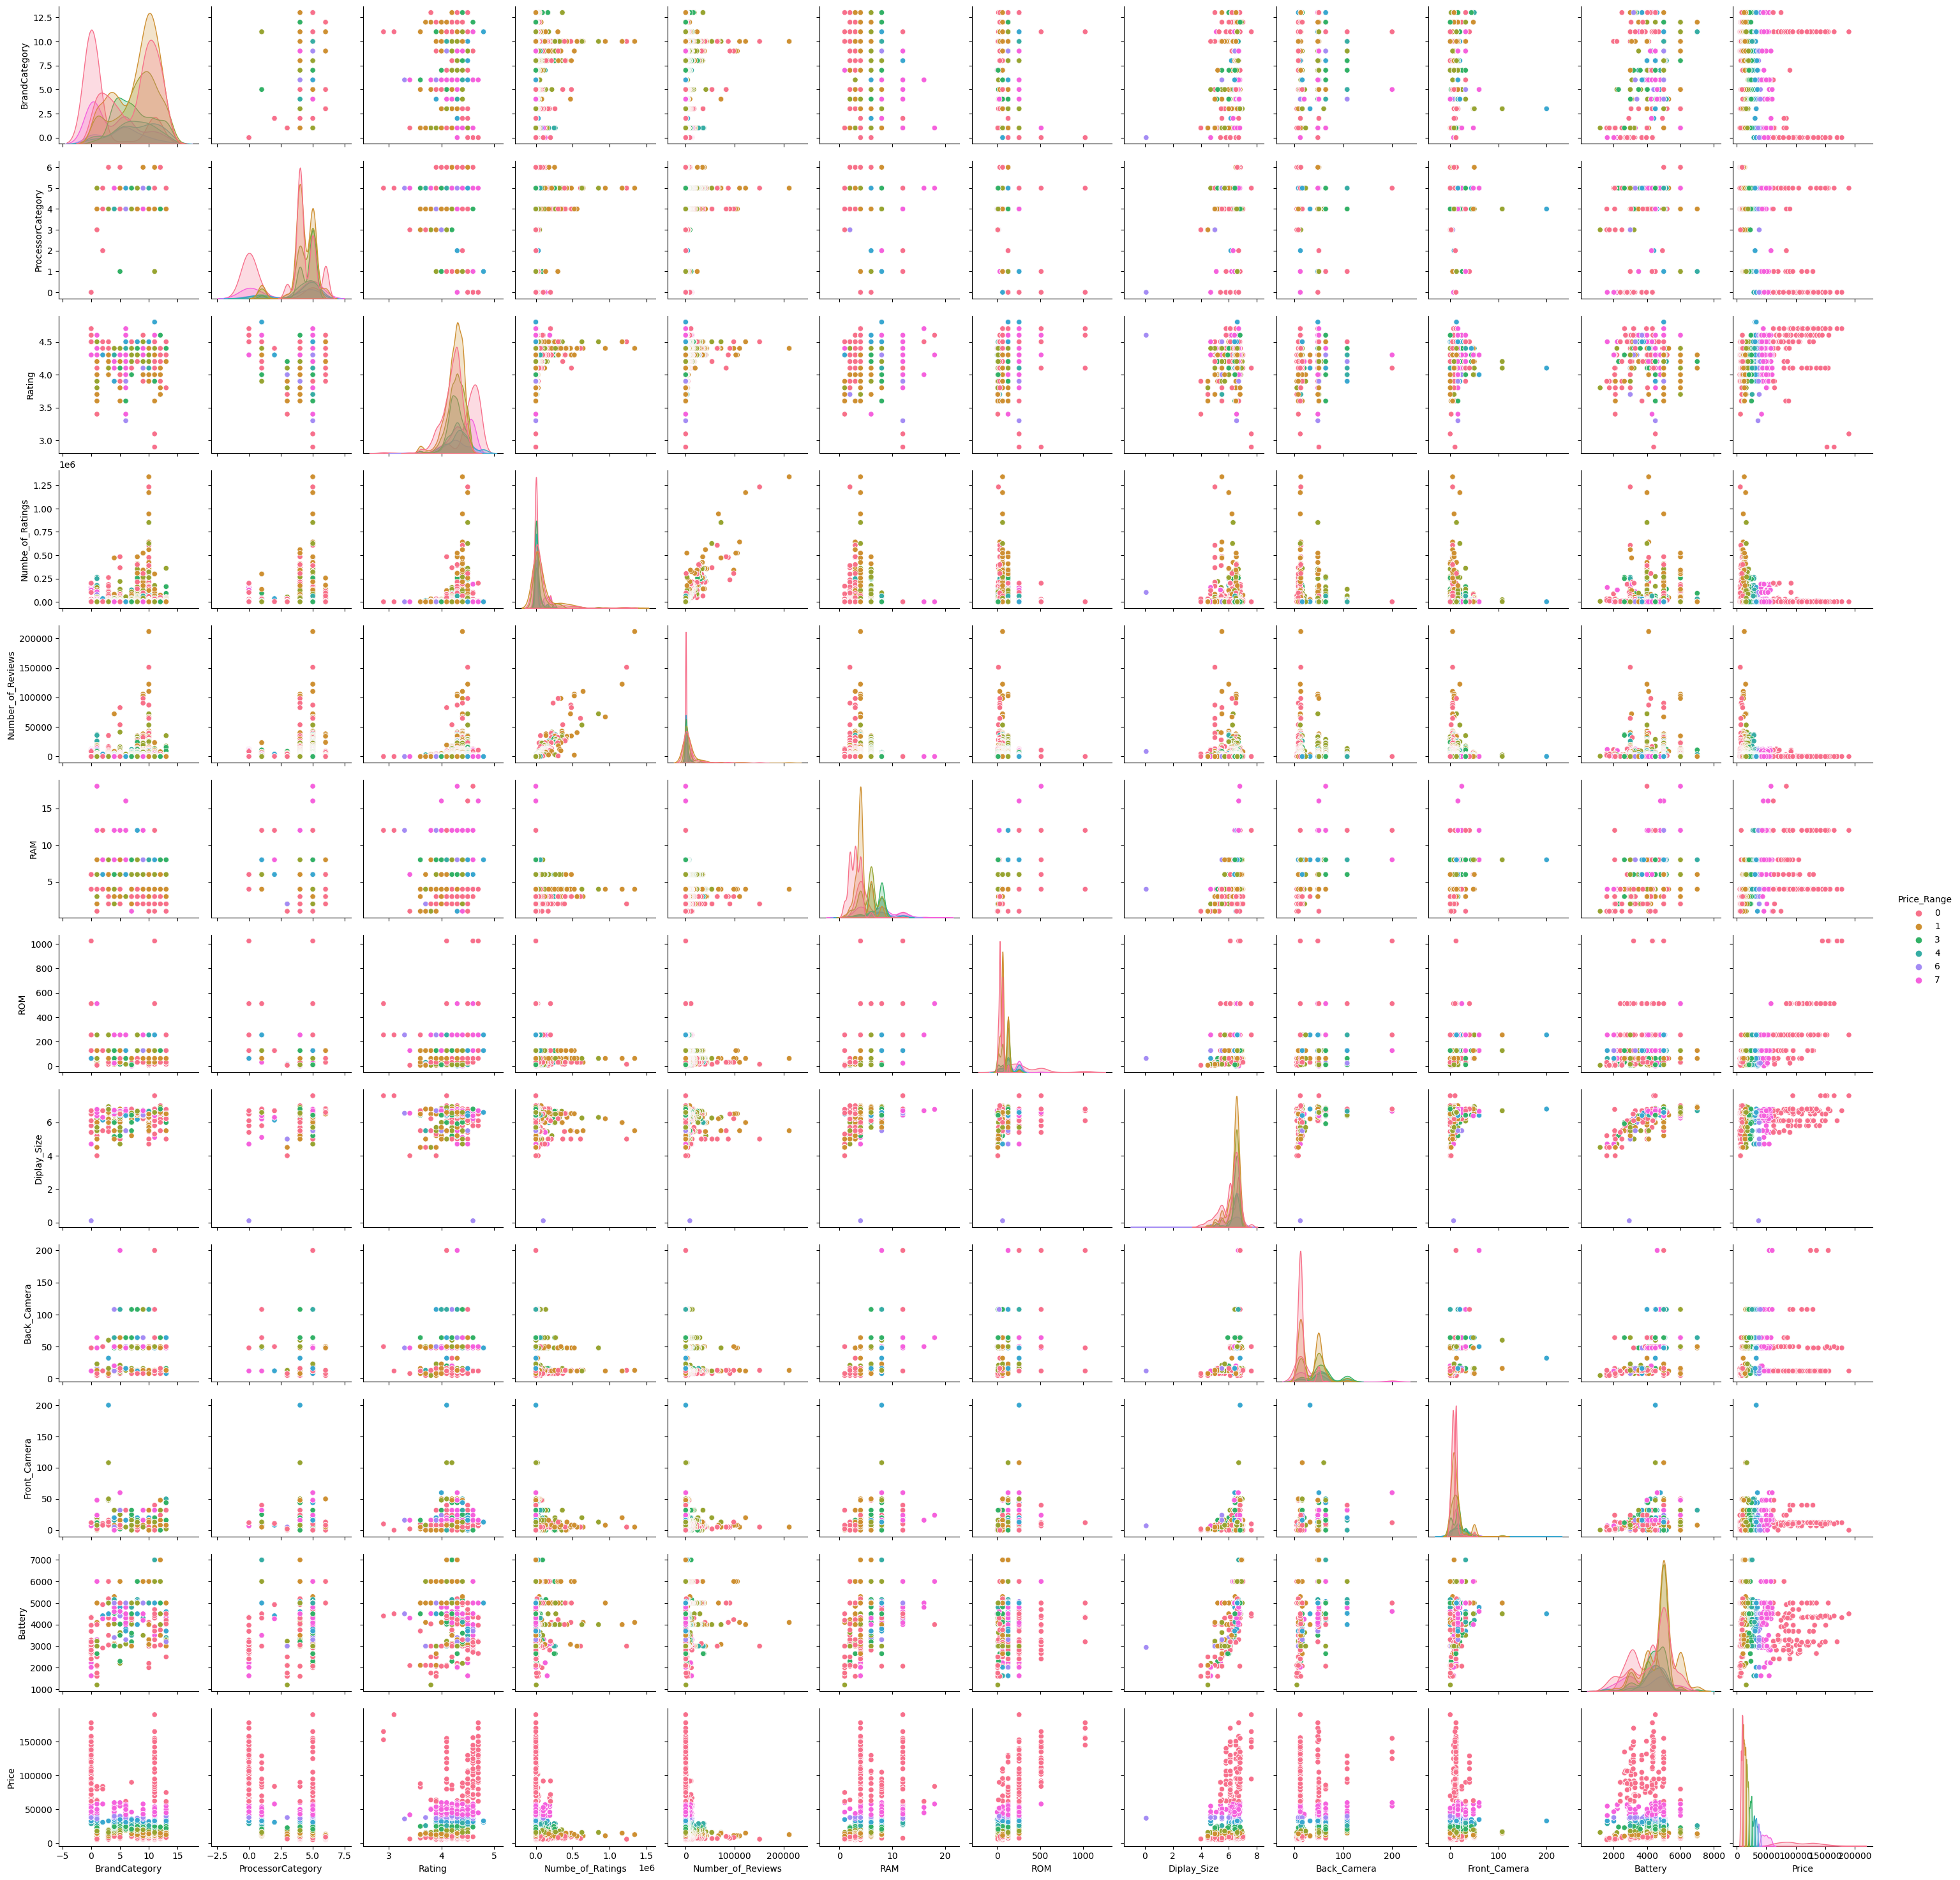

In [74]:
sns.pairplot(df, hue = "Price_Range", palette = "husl")

From the above heat map we can se that the no of rating and no of review features are more than 90 % correlated . and we can se some of the features are correlated around 60% - 70%.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [90]:
X_train.shape

(1752, 12)

Text(0, 0.5, 'Error')

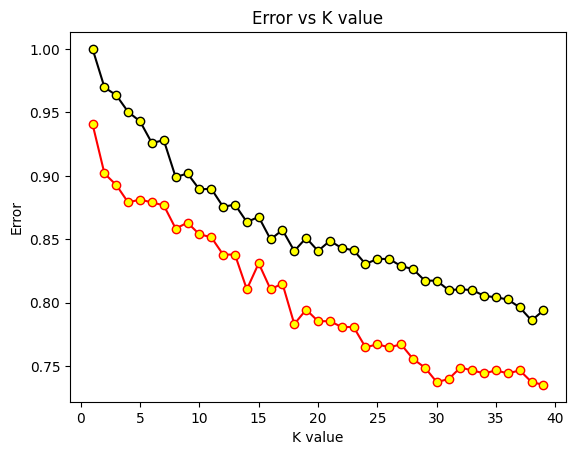

In [91]:
acc_train = []
acc_test = []
from sklearn.metrics import accuracy_score
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 acc_train.append(knn.score(X_train, y_train))
 acc_test.append(knn.score(X_test, y_test))


plt.plot(range(1, 40), acc_train, color = "black", marker = "o", markerfacecolor = "yellow")
plt.plot(range(1, 40), acc_test, color = "red", marker = "o", markerfacecolor = "yellow")
plt.title("Error vs K value")
plt.xlabel("K value")
plt.ylabel("Error")

In [93]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8538812785388128

In [94]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.889269406392694, 0.8538812785388128)

**Dimentionality Reduction using PCA**

In [106]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

x_pca = pca.fit_transform(X_train)
var = pca.explained_variance_ratio_
var

array([0.95681907, 0.04132606])

<Figure size 800x600 with 0 Axes>

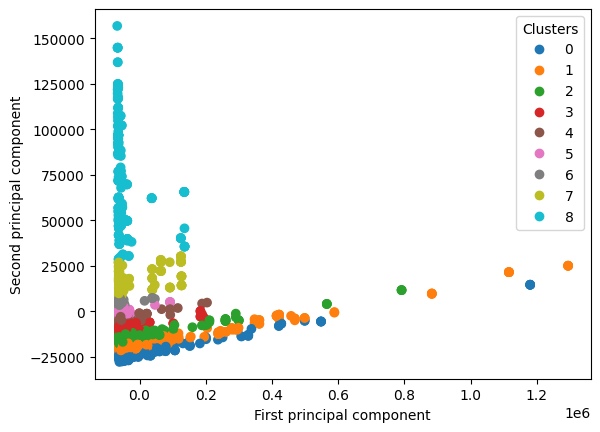

In [114]:
plt.figure(figsize = (8,6))
fig, ax = plt.subplots()
sc = plt.scatter(x_pca[:,0],x_pca[:,1],c = y_train, cmap = 'tab10')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
ax.legend(*sc.legend_elements(), title = 'Clusters')

In [107]:
knn_pca = KNeighborsClassifier(n_neighbors = 10)
knn_pca.fit(x_pca, y_train)

KNeighborsClassifier(n_neighbors=10)

In [108]:
X_test_pca = pca.transform(X_test)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_score(y_test, y_pred_pca)

0.8538812785388128

In [111]:
knn_pca.score(x_pca, y_train), knn_pca.score(X_test_pca, y_test)

(0.8972602739726028, 0.8538812785388128)